In [1]:
%load_ext autoreload
%autoreload 2
import libem
import numpy as np
from libvis import Visualizations

In [42]:
def make_enforcer(*lambdas):
    return lambda sim: [f(sim) for f in lambdas]

def enf(func, *args, **kwargs):
    return lambda sim: func(sim, *args, **kwargs)

class EMObjects:
    @staticmethod
    def point_charge(sim, location, voltage):
        sim.V[sim.global_unit_to_point(location)] = voltage
        
    @staticmethod
    def outer_edge_3d(sim, voltage):
        sim.V[0,0,:] = voltage
        sim.V[0,sim.point_space_size[1]-1,:] = voltage
        sim.V[sim.point_space_size[0]-1,0,:] = voltage
        sim.V[sim.point_space_size[0]-1,sim.point_space_size[1]-1,:] = voltage
        
        sim.V[0,:,0] = voltage
        sim.V[sim.point_space_size[0]-1,:,0] = voltage
        sim.V[0,:,sim.point_space_size[2]-1] = voltage
        sim.V[sim.point_space_size[0]-1,:,sim.point_space_size[2]-1] = voltage
        
        sim.V[:,0,0] = voltage
        sim.V[:,0,sim.point_space_size[2]-1] = voltage
        sim.V[:,sim.point_space_size[1]-1,0] = voltage
        sim.V[:,sim.point_space_size[1]-1,sim.point_space_size[2]-1] = voltage
        
    @staticmethod
    def outer_plane_3d(sim, voltage):
        sim.V[0,:,:] = voltage
        sim.V[sim.point_space_size[0]-1,:,:] = voltage
        
        sim.V[:,0,:] = voltage
        sim.V[:,sim.point_space_size[1]-1,:] = voltage
        
        sim.V[:,:,0] = voltage
        sim.V[:,:,sim.point_space_size[2]-1] = voltage

In [154]:
sim = libem.EMSimulationSpace3D(space_size=(2, 2, 2), top_left=(-1, -1, -1), scale=100)
    
sim.compute(make_enforcer(
    enf(EMObjects.point_charge, (0, 0, 0.5), 1),
    enf(EMObjects.point_charge, (0, 0, -0.5), -1)
    
    #BoundaryEnforcer.point_charge((0, 0, -2.5), -1)
))
print("Done.")

Computed in 50 iterations.
Done.


Set visualization resolution to 5


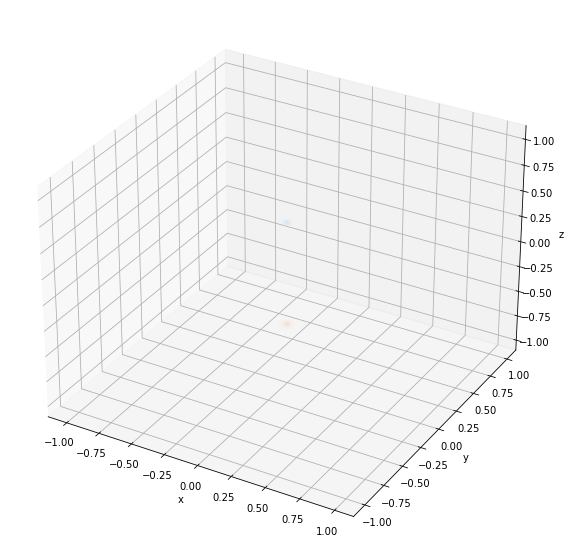

In [155]:
Visualizations.colormesh_3d(sim)

In [147]:
sim2d = libem.EMSimulationSpace2D.from_3d(sim, axis=0, location=0)

Creating 2D dataset
Done.


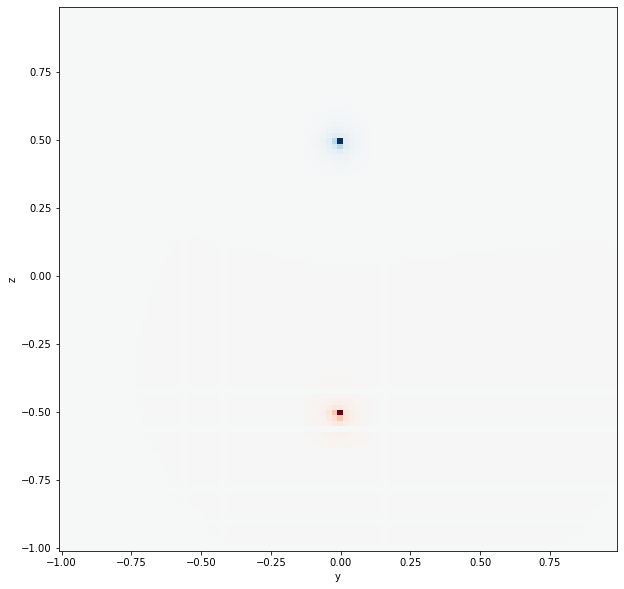

In [148]:
Visualizations.colormesh_2d(sim2d)

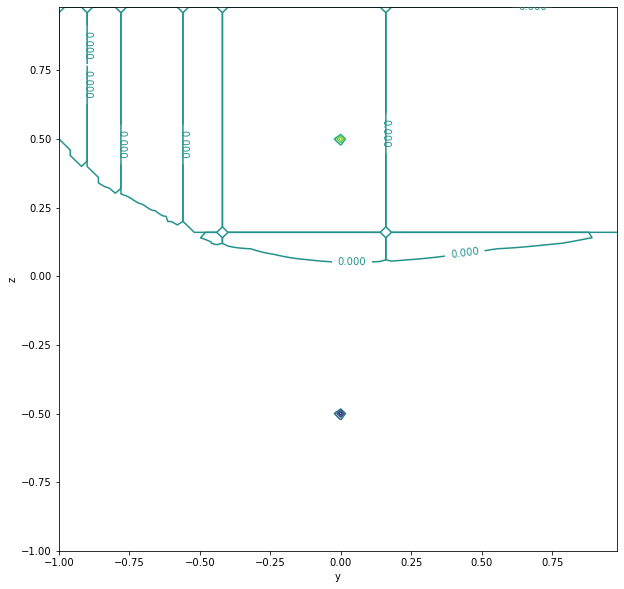

In [149]:
Visualizations.contour_2d(sim2d)